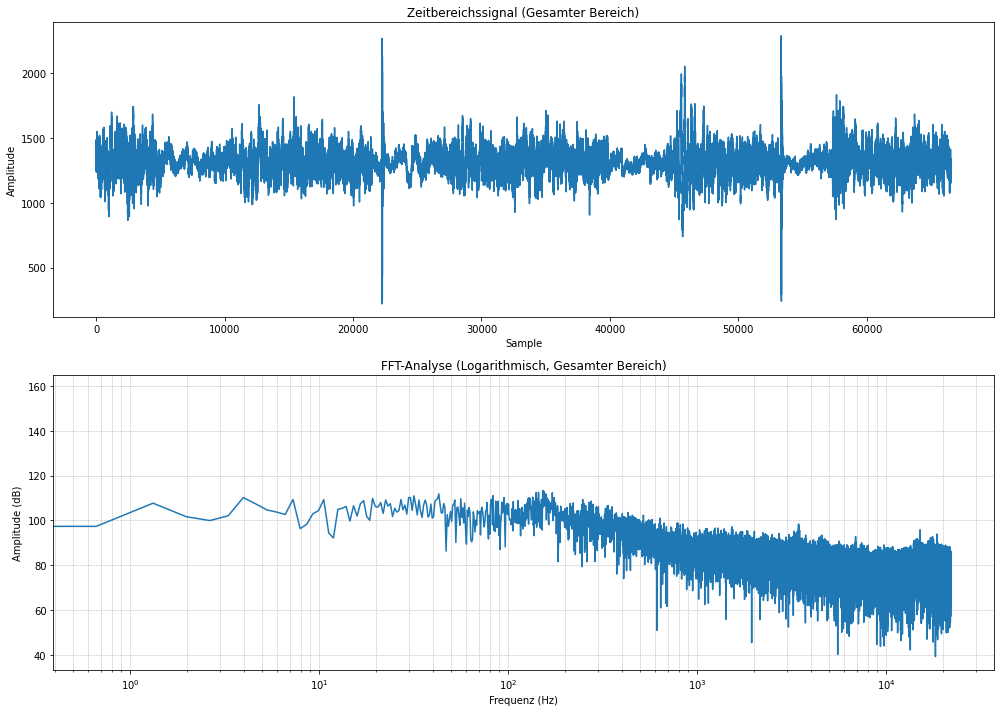

interactive(children=(IntSlider(value=0, description='Start Sample', max=66559), IntSlider(value=2000, descrip…

In [16]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, IntText, VBox, HBox

# WAV-Datei laden
signal_wave = wave.open('adc_data.wav', 'r')
sample_rate = signal_wave.getframerate()
sig = np.frombuffer(signal_wave.readframes(signal_wave.getnframes()), dtype=np.int16)

# Parameter
window_size = 2000  # Standard-Fenstergröße

# Funktion für die vollständige Anzeige
def plot_full_signal_and_fft():
    # FFT für das gesamte Signal (logarithmisch)
    fft_full = np.fft.fft(sig)
    freqs_full = np.fft.fftfreq(len(sig), d=1/sample_rate)
    positive_freqs_full = freqs_full[:len(freqs_full)//2]
    positive_fft_full = np.abs(fft_full[:len(fft_full)//2])
    log_fft_full = 20 * np.log10(positive_fft_full + 1e-12)

    # Plots erstellen
    plt.figure(figsize=(14, 10))

    # Zeitbereichssignal
    plt.subplot(211)
    plt.plot(sig)
    plt.title('Zeitbereichssignal (Gesamter Bereich)')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # FFT (logarithmisch) für das gesamte Signal
    plt.subplot(212)
    plt.semilogx(positive_freqs_full, log_fft_full)
    plt.title('FFT-Analyse (Logarithmisch, Gesamter Bereich)')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

# Funktion für interaktive Anzeige mit auswählbarem Start- und Endbereich
def plot_with_sliders(start_sample, end_sample, freq_start, freq_end):
    # Sicherstellen, dass der Bereich gültig ist
    if start_sample >= end_sample:
        end_sample = start_sample + 1

    # Ausschnitt auswählen
    selected_sig = sig[start_sample:end_sample]

    # FFT (logarithmisch) für den Ausschnitt
    fft_selected = np.fft.fft(selected_sig)
    freqs_selected = np.fft.fftfreq(len(selected_sig), d=1/sample_rate)
    positive_freqs_selected = freqs_selected[:len(freqs_selected)//2]
    positive_fft_selected = np.abs(fft_selected[:len(fft_selected)//2])
    log_fft_selected = 20 * np.log10(positive_fft_selected + 1e-12)

    # Begrenzen der Frequenzen auf das gewünschte Fenster
    freq_mask = (positive_freqs_selected >= freq_start) & (positive_freqs_selected <= freq_end)
    filtered_freqs = positive_freqs_selected[freq_mask]
    filtered_fft = log_fft_selected[freq_mask]

    # Plots erstellen
    plt.figure(figsize=(14, 10))

    # Zeitbereichssignal
    plt.subplot(311)
    plt.plot(range(start_sample, end_sample), selected_sig)
    plt.title(f'Zeitbereichssignal (Samples {start_sample} bis {end_sample})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # FFT (logarithmisch) im eingegrenzten Bereich
    plt.subplot(312)
    plt.semilogx(filtered_freqs, filtered_fft)
    plt.title(f'FFT-Analyse (Logarithmisch, Frequenzen {freq_start} Hz bis {freq_end} Hz)')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Spektrogramm
    plt.subplot(313)
    plt.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900, cmap='viridis')
    plt.title('Spektrogramm (Gesamter Bereich)')
    plt.xlabel('Zeit (s)')
    plt.ylabel('Frequenz (Hz)')

    plt.tight_layout()
    plt.show()

# Widgets für die Steuerung
max_frequency = sample_rate // 2  # Nyquist-Frequenz
start_sample_slider = IntSlider(min=0, max=len(sig)-1, step=1, value=0, description='Start Sample')
end_sample_slider = IntSlider(min=0, max=len(sig), step=1, value=window_size, description='End Sample')
freq_start_slider = IntSlider(min=1, max=max_frequency, step=10, value=10, description='Start Frequenz (Hz)')
freq_end_slider = IntSlider(min=1, max=max_frequency, step=10, value=max_frequency, description='End Frequenz (Hz)')

start_sample_text = IntText(value=0, description='Start Sample:')
end_sample_text = IntText(value=window_size, description='End Sample:')
freq_start_text = IntText(value=10, description='Start Frequenz (Hz):')
freq_end_text = IntText(value=max_frequency, description='End Frequenz (Hz):')

# Synchronisierung der Slider mit den Textfeldern
def sync_slider_with_text(slider, text):
    def update_slider(change):
        slider.value = change['new']
    def update_text(change):
        text.value = change['new']
    text.observe(update_slider, names='value')
    slider.observe(update_text, names='value')

sync_slider_with_text(start_sample_slider, start_sample_text)
sync_slider_with_text(end_sample_slider, end_sample_text)
sync_slider_with_text(freq_start_slider, freq_start_text)
sync_slider_with_text(freq_end_slider, freq_end_text)

# Zuerst die Gesamtdarstellung anzeigen
plot_full_signal_and_fft()

# Interaktive Anzeige
interact(
    plot_with_sliders,
    start_sample=start_sample_slider,
    end_sample=end_sample_slider,
    freq_start=freq_start_slider,
    freq_end=freq_end_slider,
);

# Eingabeboxen separat anzeigen
VBox([
    HBox([start_sample_slider, start_sample_text]),
    HBox([end_sample_slider, end_sample_text]),
    HBox([freq_start_slider, freq_start_text]),
    HBox([freq_end_slider, freq_end_text])
])
